# Ejercicio PCA (Principal Component Analysis)
En este ejercicio vas a trabajar con un dataset de información de ciudadanos como el estado civil, número de hijos, qué gastos e ingresos tiene, etc...

Se cuenta con un target, que es si el ciudadano va a alquilar o a comprar una vivienda. Para ello,  con PCA

### Importamos librerias
Principales librerías que usarás durante el notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Cargamos datos de entrada
1. Carga el csv *comprar_alquilar.csv*
2. Obtén la información básica: columnas, dimensiones, descripción de las variables, missings...

In [27]:
df = pd.read_csv('data/comprar_alquilar.csv')
print(df.shape)
df.info()

(202, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB


### Visualicemos las dimensiones
Realiza un análisis univariante. Realiza la gráfica que consideres para cada variable, diferenciando por colores el target (*comprar*).

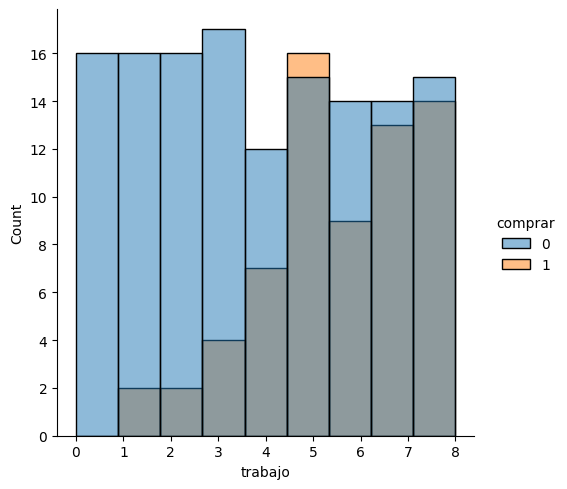

In [33]:
sns.displot(data=df, x='trabajo', hue='comprar');

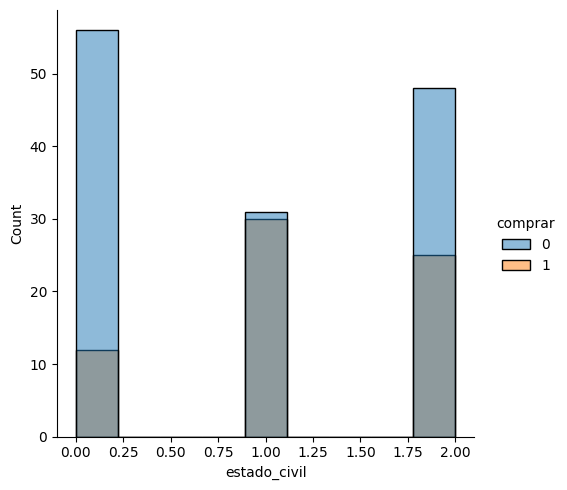

In [32]:
sns.displot(data=df, x='estado_civil', hue='comprar');

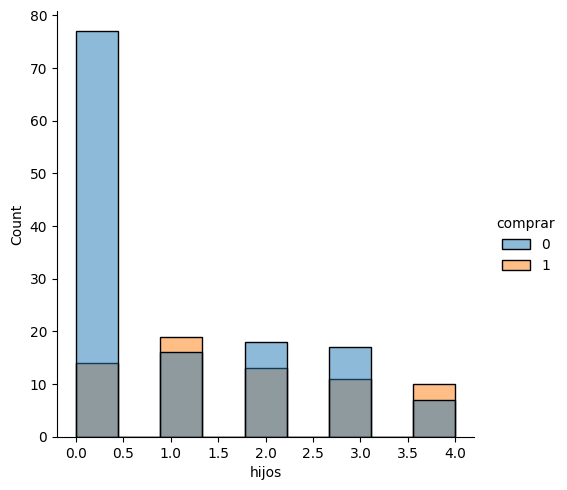

In [15]:
sns.displot(data=df, x='hijos', hue='comprar');

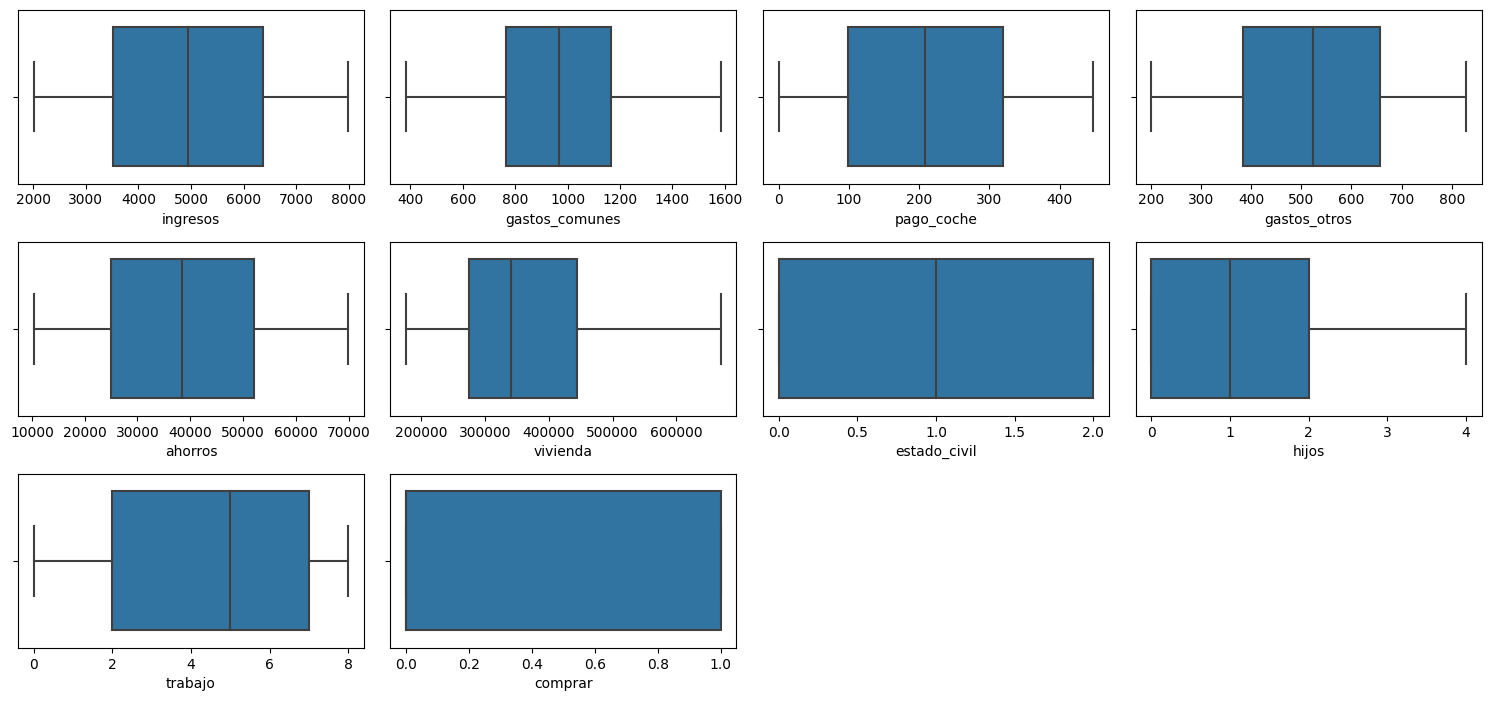

In [44]:
cols = 4
rows = 4
num_cols = df.columns
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows, cols, i+1)
    
    sns.boxplot(x=df[col], ax=ax)
    
fig.tight_layout()  
plt.show()

In [5]:
sns.pairplot(df, hue='comprar')

## Estandariza los datos
Como el objetivo de estos primeros apartados no es encontrar el mejor modelo con el mejor accuracy, por sencillez, no es necesario dividir en train y test.

In [47]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

## Aplicamos PCA
Aplica el algoritmo de PCA para 9 components, es decir, para todas las features

In [49]:
pca = PCA(n_components=9)
modelo_pca = pca.fit(df_scaled)

### Veamos cómo de buenos predictores son las nuevas dimensiones
Responde a las siguientes preguntas:
1. ¿Cuánta varianza explica cada Principal Component?
2. ¿Y de manera acumulada empezando por el PC1?
3. ¿Cuánta varianza explicarían sólo 5 componentes?

In [51]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
#### CODE ####

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------


### Graficamos la variacion explicada acumulada
Representa en un diagrama de lineas la evolución de la varianza acumulada en función de los PC

In [55]:
varianza_explicativa = modelo_pca.explained_variance_ratio_
suma_varianza = np.cumsum(varianza_explicativa)

# Diagrama de líneas de la suma acumulada de la varianza explicativa
plt.plot(range(1, len(suma_varianza) + 1), suma_varianza, marker='o')
plt.xlabel('Número de componentes principales')
plt.ylabel('Suma acumulada de la varianza explicativa')
plt.title('Suma acumulada de la varianza explicativa del PCA')
plt.grid(True)
plt.show()

# Cinco componentes explicarían más del 80% de la varianza

### Veamos la correlación entre las nuevas componentes y las dimensiones originales
Representa en un mapa de calor los PCA vs las variables originales. Esta información la puedes obtener del atributo de PCA *components_*.

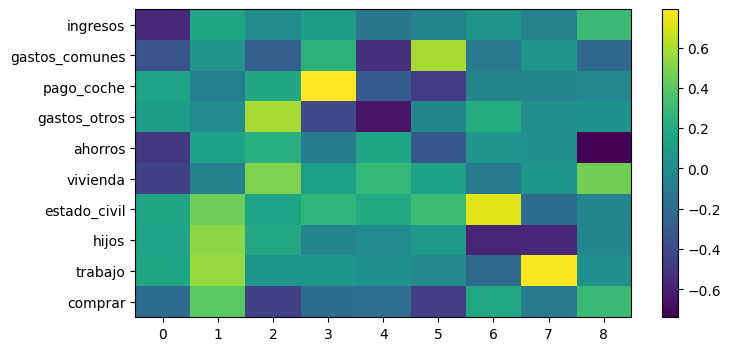

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(df.columns)), df.columns)
plt.grid(False)
plt.colorbar();

## Predicciones
1. Divide en train y test
2. Prepara un pipeline compuesto por:
    - StandardScaler,
    - PCA de 5 componentes
    - KNN con 3 vecinos
3. Entrena
4. Predice en test
5. Calcula el accuracy score en train y test
6. Representa la matriz de confusión
7. ¿Qué combinación de vecinos y componentes mejoraría el accuracy en test?
8. Guarda tu modelo

In [70]:
X = df.drop('comprar', axis=1)
y = df['comprar']

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42) 

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), PCA(n_components=5), KNeighborsClassifier(n_neighbors=3))

In [76]:
modelo = pipe.fit(X_train, y_train)

Guarda el modelo

In [77]:
import pickle
with open('modelo.pkl', 'wb') as archivo:
    pickle.dump(modelo, archivo)